In [ ]:
steps:
1. split
2. scatter plot
3. Apply algo

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Social_Network_Ads.csv")

In [4]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
data.shape

(400, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [13]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [15]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [17]:
data.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [19]:
data["Purchased"].unique()

array([0, 1], dtype=int64)

In [21]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
x = data[["Age","EstimatedSalary"]].values
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [25]:
y = data["Purchased"].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)

In [29]:
x_train.shape

(300, 2)

In [30]:
x_test.shape

(100, 2)

In [31]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [32]:
x_train.dtype
x_test.dtype

dtype('float64')

In [33]:
x_train

array([[4.20e+01, 7.50e+04],
       [1.90e+01, 1.90e+04],
       [4.60e+01, 3.20e+04],
       [3.60e+01, 5.40e+04],
       [3.50e+01, 9.10e+04],
       [5.50e+01, 1.30e+05],
       [3.10e+01, 7.40e+04],
       [4.00e+01, 6.00e+04],
       [4.80e+01, 4.10e+04],
       [3.70e+01, 7.80e+04],
       [4.20e+01, 5.40e+04],
       [4.10e+01, 5.20e+04],
       [3.70e+01, 7.40e+04],
       [3.10e+01, 3.40e+04],
       [2.60e+01, 8.40e+04],
       [4.90e+01, 3.60e+04],
       [4.90e+01, 6.50e+04],
       [5.00e+01, 2.00e+04],
       [5.90e+01, 7.60e+04],
       [3.00e+01, 8.00e+04],
       [2.60e+01, 8.60e+04],
       [2.80e+01, 5.90e+04],
       [3.60e+01, 6.30e+04],
       [2.90e+01, 4.30e+04],
       [3.20e+01, 1.80e+04],
       [3.40e+01, 4.30e+04],
       [4.70e+01, 5.00e+04],
       [3.70e+01, 7.20e+04],
       [2.60e+01, 1.60e+04],
       [3.90e+01, 7.70e+04],
       [3.20e+01, 1.35e+05],
       [3.50e+01, 7.70e+04],
       [3.50e+01, 2.00e+04],
       [3.70e+01, 5.30e+04],
       [3.50e+

In [34]:
y_train.shape

(300,)

In [41]:
y_train.dtype

dtype('int64')

## Feature Scalling

In [46]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()  #Standard scaler ki range hoti hai[-3 to +3]

In [50]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
x_train

array([[ 0.42118245,  0.15177847],
       [-1.86353366, -1.48066604],
       [ 0.81852438, -1.10170571],
       [-0.17483045, -0.46038822],
       [-0.27416593,  0.61819119],
       [ 1.71254373,  1.75507219],
       [-0.67150786,  0.12262768],
       [ 0.22251148, -0.28548345],
       [ 1.01719535, -0.83934855],
       [-0.07549497,  0.23923086],
       [ 0.42118245, -0.46038822],
       [ 0.32184696, -0.51868981],
       [-0.07549497,  0.12262768],
       [-0.67150786, -1.04340412],
       [-1.16818528,  0.41413563],
       [ 1.11653083, -0.98510253],
       [ 1.11653083, -0.13972948],
       [ 1.21586631, -1.45151524],
       [ 2.10988566,  0.18092927],
       [-0.77084335,  0.29753245],
       [-1.16818528,  0.47243721],
       [-0.96951431, -0.31463425],
       [-0.17483045, -0.19803107],
       [-0.87017883, -0.78104696],
       [-0.57217238, -1.50981683],
       [-0.37350142, -0.78104696],
       [ 0.91785986, -0.5769914 ],
       [-0.07549497,  0.06432609],
       [-1.16818528,

In [54]:
x_test

array([[ 1.41453728,  0.58904039],
       [ 1.51387276,  0.06432609],
       [ 0.22251148,  0.06432609],
       [ 1.91121469, -1.07255491],
       [ 0.22251148, -0.25633266],
       [-1.86353366, -1.42236445],
       [-0.57217238,  0.47243721],
       [-0.27416593,  0.06432609],
       [-1.26752076,  0.50158801],
       [ 2.10988566, -1.18915809],
       [-0.87017883,  0.15177847],
       [ 0.7191889 ,  0.26838165],
       [-1.36685625, -1.10170571],
       [ 1.81187921, -0.28548345],
       [ 0.123176  , -0.81019776],
       [-1.86353366,  0.18092927],
       [-1.16818528,  0.06432609],
       [ 0.91785986, -1.45151524],
       [-1.96286914, -0.51868981],
       [-1.76419818, -1.36406286],
       [-0.07549497,  0.26838165],
       [ 1.71254373,  1.60931821],
       [-0.27416593, -0.43123742],
       [ 0.22251148,  0.15177847],
       [-0.87017883, -0.25633266],
       [-1.96286914, -0.05227709],
       [-0.87017883,  2.27978649],
       [-1.26752076,  0.58904039],
       [ 0.91785986,

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_model = LogisticRegression()

In [60]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [62]:
y_pred = log_model.predict(x_test)

In [64]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [66]:
y_test

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
from sklearn .metrics import confusion_matrix


In [70]:
cn = confusion_matrix(y_test,y_pred)

In [72]:
cn

array([[59,  3],
       [11, 27]], dtype=int64)

In [74]:
import seaborn as sns

<Axes: >

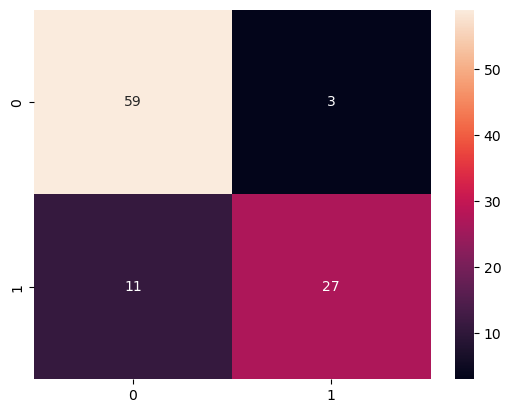

In [76]:
sns.heatmap(cn,annot=True)

In [78]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        62
           1       0.90      0.71      0.79        38

    accuracy                           0.86       100
   macro avg       0.87      0.83      0.84       100
weighted avg       0.86      0.86      0.86       100



## Example1

###### Will person buy a life insurance or not? #######

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


<function matplotlib.pyplot.show(close=None, block=None)>

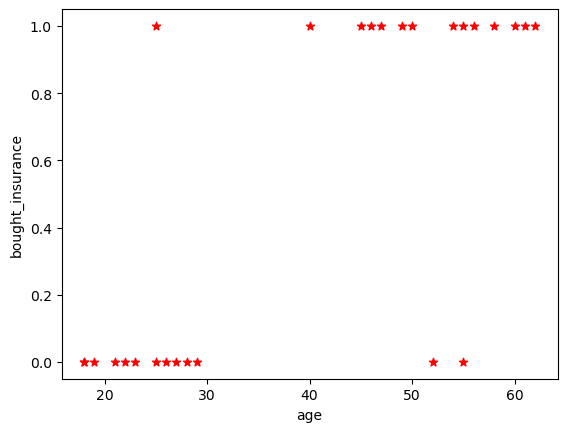

In [88]:
plt.scatter(df["age"], df["bought_insurance"], color="red", marker="*")
plt.xlabel("age")
plt.ylabel("bought_insurance")
plt.show

In [90]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(df[["age"]],df.bought_insurance, test_size=0.25)

In [94]:
x_train.shape

(20, 1)

In [96]:
x_test.shape

(7, 1)

In [98]:
x_test

,age
10,18
11,28
14,49
15,55
2,47
13,29
22,40


In [100]:
from sklearn.linear_model import LogisticRegression

In [102]:
reg = LogisticRegression()

In [104]:
reg.fit(x_train,y_train)

LogisticRegression()

In [106]:
y_pred=reg.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [108]:
y_test

10    0
11    0
14    1
15    1
2     1
13    0
22    1
Name: bought_insurance, dtype: int64

In [110]:
from sklearn.metrics import confusion_matrix

In [112]:
cn = confusion_matrix(y_pred,y_test)
cn

array([[3, 1],
       [0, 3]], dtype=int64)

In [114]:
import seaborn as sns

<Axes: >

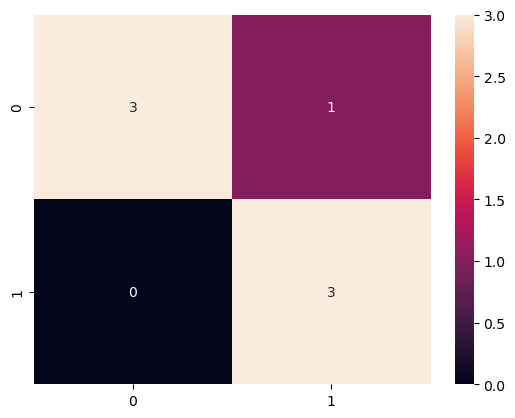

In [116]:
sns.heatmap(cn,annot=True)

In [117]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.75      0.86         4

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



In [122]:
reg.predict_proba(x_test)

array([[0.9296621 , 0.0703379 ],
       [0.8088892 , 0.1911108 ],
       [0.27919358, 0.72080642],
       [0.16359948, 0.83640052],
       [0.32723339, 0.67276661],
       [0.79066498, 0.20933502],
       [0.51908233, 0.48091767]])

### Example 3

##### Multiclass classification #####

In [126]:
import matplotlib.pyplot as plt

In [128]:
from sklearn.datasets import load_digits

In [130]:
digits = load_digits()

In [132]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [134]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

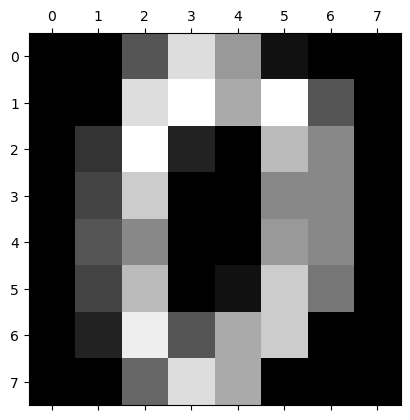

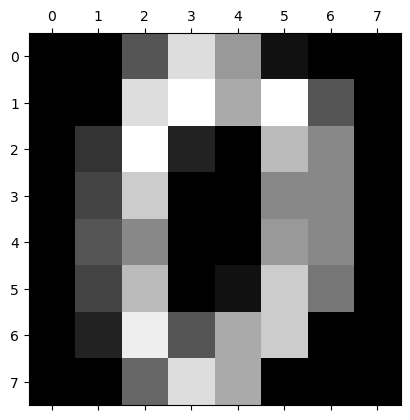

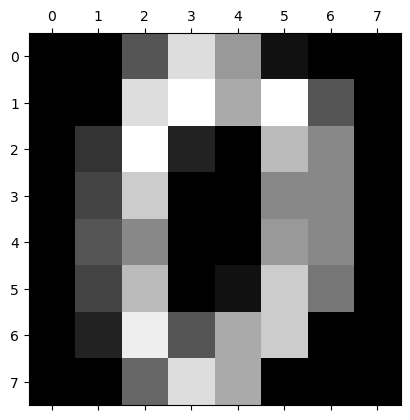

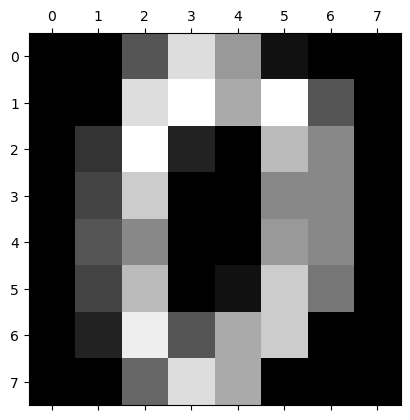

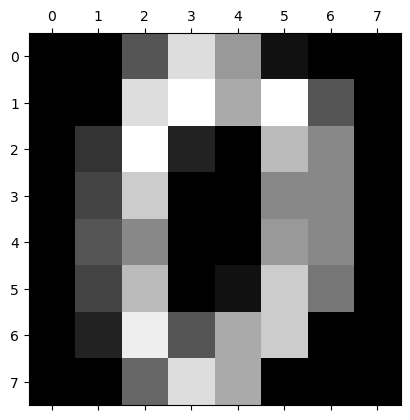

In [136]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[0])

In [137]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test = train_test_split(digits.data, digits.target, test_size=0.20,random_state=45)

In [140]:
x_train.shape

(1437, 64)

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
reg = LogisticRegression(max_iter=500)

In [143]:
reg.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [144]:
reg.score(x_test, y_test)

0.9527777777777777

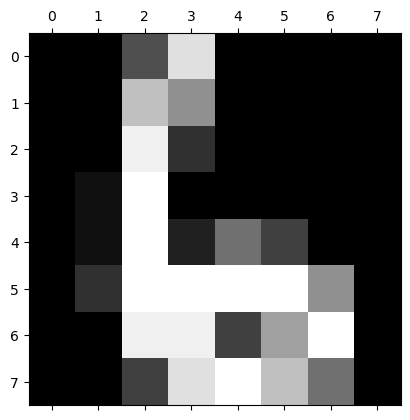

In [152]:
plt.matshow(digits.images[67])

In [153]:
digits.target[67]

6

In [156]:
reg.predict([digits.data[67]])

array([6])

In [157]:
reg.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [158]:
from sklearn.metrics import confusion_matrix

In [164]:
y_pred = reg.predict(x_test)
y_pred

array([0, 8, 7, 4, 0, 5, 1, 3, 9, 9, 4, 5, 0, 0, 6, 4, 6, 2, 2, 8, 9, 7,
       7, 8, 1, 3, 9, 0, 7, 7, 6, 7, 4, 4, 5, 0, 6, 3, 2, 1, 0, 5, 7, 6,
       9, 7, 8, 6, 7, 1, 8, 3, 4, 7, 4, 4, 2, 8, 8, 7, 4, 8, 5, 4, 6, 8,
       6, 1, 5, 1, 8, 7, 9, 9, 2, 4, 9, 6, 4, 1, 7, 2, 0, 2, 3, 2, 8, 9,
       3, 9, 1, 8, 3, 7, 2, 2, 6, 8, 0, 6, 6, 4, 7, 4, 5, 7, 0, 9, 3, 4,
       4, 0, 3, 9, 8, 0, 4, 5, 7, 0, 9, 1, 4, 1, 9, 0, 7, 3, 2, 7, 6, 2,
       0, 7, 4, 4, 3, 4, 5, 6, 3, 3, 5, 7, 3, 6, 9, 5, 4, 2, 5, 9, 4, 4,
       7, 3, 5, 0, 9, 2, 4, 0, 7, 3, 6, 1, 9, 3, 7, 3, 9, 5, 3, 6, 3, 5,
       7, 4, 5, 7, 5, 9, 0, 2, 6, 4, 1, 5, 5, 2, 8, 9, 1, 3, 6, 7, 3, 6,
       8, 8, 8, 8, 4, 4, 2, 6, 6, 4, 3, 9, 3, 8, 9, 5, 6, 4, 3, 2, 9, 4,
       9, 3, 0, 2, 0, 2, 1, 7, 5, 6, 1, 3, 6, 1, 6, 8, 0, 5, 3, 5, 1, 1,
       4, 6, 2, 6, 4, 4, 5, 6, 9, 3, 7, 8, 8, 3, 3, 9, 2, 1, 3, 7, 4, 1,
       1, 5, 7, 2, 4, 9, 2, 3, 3, 6, 0, 2, 8, 3, 2, 2, 1, 9, 9, 4, 6, 3,
       6, 1, 8, 6, 2, 3, 2, 7, 7, 8, 2, 9, 6, 0, 9,

In [166]:
cn = confusion_matrix(y_test,y_pred)
cn

array([[26,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 43,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 27,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  1,  1],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 29,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  2,  1, 33]], dtype=int64)

In [168]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'Truth')

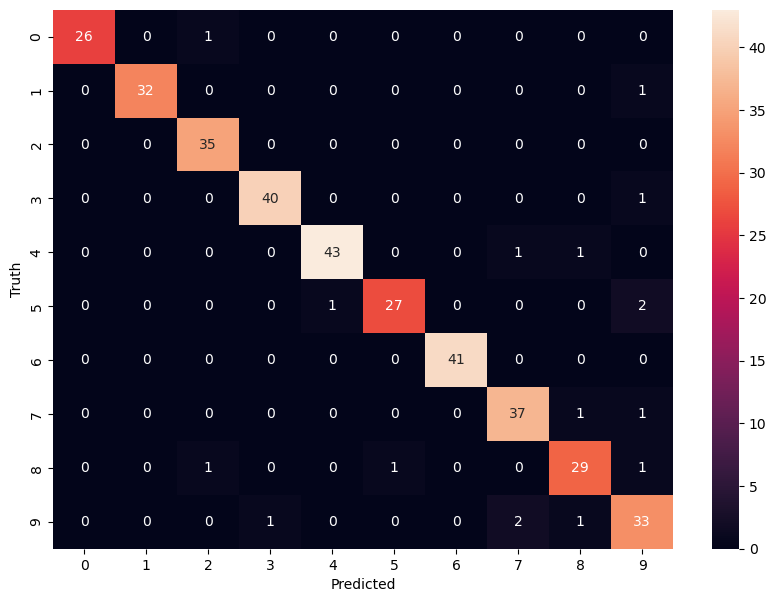

In [170]:
plt.figure(figsize=(10,7))
sns.heatmap(cn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [171]:
from sklearn.metrics import classification_report

In [172]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       0.97      1.00      0.98        32
           2       1.00      0.95      0.97        37
           3       0.98      0.98      0.98        41
           4       0.96      0.98      0.97        44
           5       0.90      0.96      0.93        28
           6       1.00      1.00      1.00        41
           7       0.95      0.93      0.94        40
           8       0.91      0.91      0.91        32
           9       0.89      0.85      0.87        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



## Pickle ##

##### in pickle we can performed read/write operation and can be used for generalised model joblib is more faster than pickle #####

In [180]:
import joblib

In [182]:
joblib.dump(log_model, "log_model_network.pkl")

['log_model_network.pkl']

In [184]:
from pickle import dump

In [188]:
dump(sc,open("scaler_log.pkl","wb"))

##### Now we fit this mdel in file now we have to extract that file #####